# Genere una Bodega de datos que permita responder al menos 15 preguntas elaboradas por el equipo. (Adjunte las 15 preguntas con las 15 consultas SQL que respondan a las preguntas y la respectiva gráfica)

A partir de la depuración de datos del punto 1, se cargaron las tablas a BigQuery formando así la bodega de datos, a continuación se observan las tablas principales y auxiliares:

In [167]:
import json
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [105]:
data = pd.read_csv("Total_DB.csv")
data

/home/judarangobu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3,6,9,11,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Country,Gender,Age,Experience,Salary,AngularJS,C,CPlusPlus,CSS,...,Nodejs,ObjectiveC,PHP,Perl,Python,Ruby,SQL,SQL_Server,TypeScript,jQuery
0,2013,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,Canada,Male,30-34,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,Norway,Male,35-39,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,Mongolia,Male,20-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,Germany,Male,20-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016,United States of America,Male,25-29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016,United Kingdom,Male,30-34,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016,NaN,Male,30-34,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016,China,Male,25-29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## PREGUNTAS

### 1.  Cuales son los 5 lenguajes de programación más usados en el año 2017 y 2011?

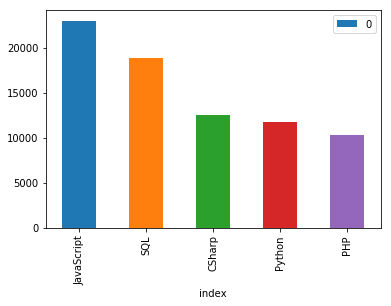

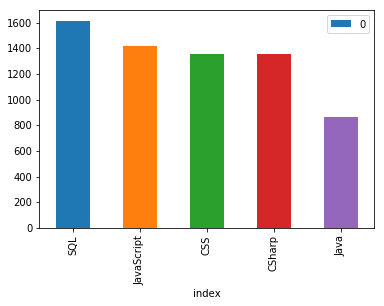

In [14]:
dataset1 = data[['Year','AngularJS','C', 'CPlusPlus','CSS','CSharp','HTML5','Java','JavaScript','Nodejs','ObjectiveC','PHP','Perl','Python','Ruby','SQL','SQL_Server','TypeScript','jQuery']]

data2017 = dataset1[dataset1["Year"] == 2017].count().sort_values(ascending = False).reset_index()
datos2017 =data2017.drop([0],axis=0).head(5).plot.bar(x = "index", y = 0)

data2011 = dataset1[dataset1["Year"] == 2011].count().sort_values(ascending = False).reset_index()
datos2011 =data2011.drop([0],axis=0).head(5).plot.bar(x = "index", y = 0)

### 2. Cuáles fueron los 8 países con más preguntas durante el año 2013?

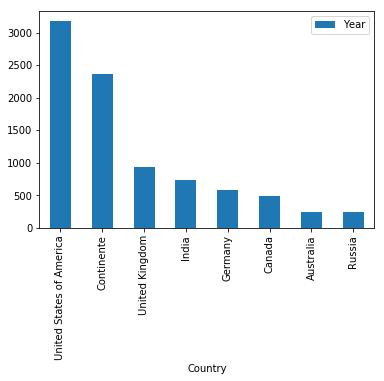

In [153]:
datos= data.loc[:, ['Year', 'Country']]
Paises2013 = datos[datos["Year"] == 2013].groupby(['Country']).count()
Paises = Paises2013.sort_values('Year',ascending=False).head(8)
Paises.plot.bar()

Text(0,0.5,'Países')

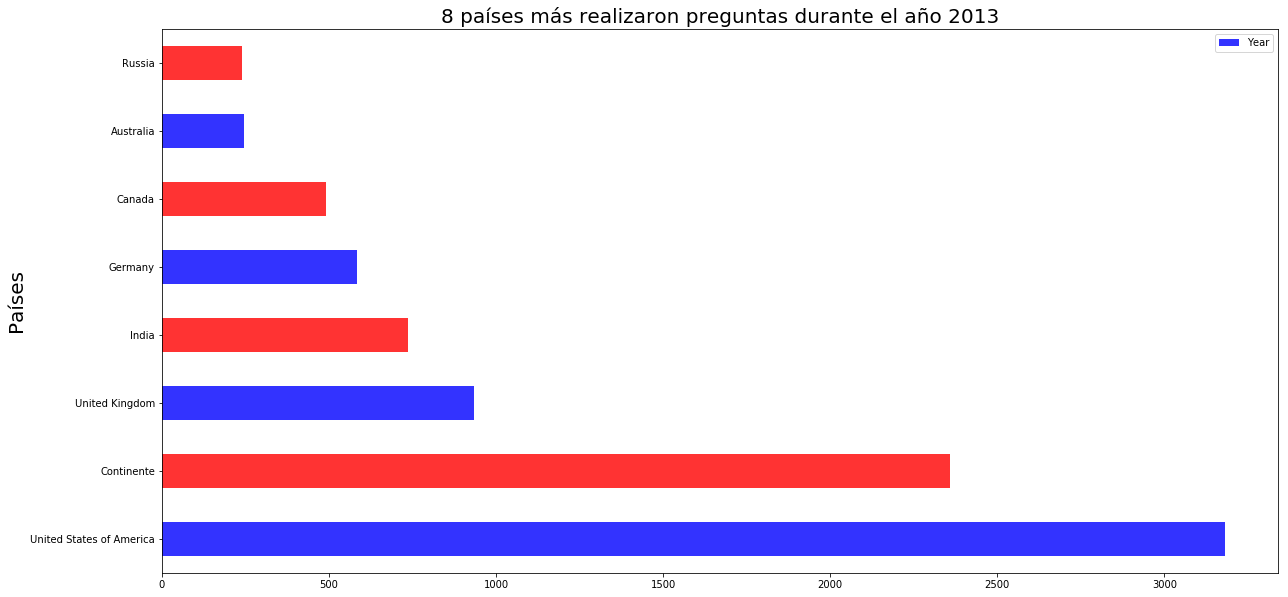

In [201]:
Paises.plot(kind='barh', alpha = 0.8, color='br',figsize=(20,10))
plt.title('8 países más realizaron preguntas durante el año 2013',fontsize=20)
plt.ylabel("Países", fontsize=20)

### 4. Cuántas fueron las preguntas realizadas en Estados Unidos por año?

In [197]:
datos= data.loc[:, ['Year', 'Country']]
Paises2013 = datos[datos["Country"] == 'United States of America'].groupby(['Year']).count()
Paises2013

,Country
Year,
2011,1037
2012,1785
2013,3181
2014,2128
2015,4745
2016,13539
2017,11508


/home/judarangobu/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


Text(0,0.5,'Número de preguntas')

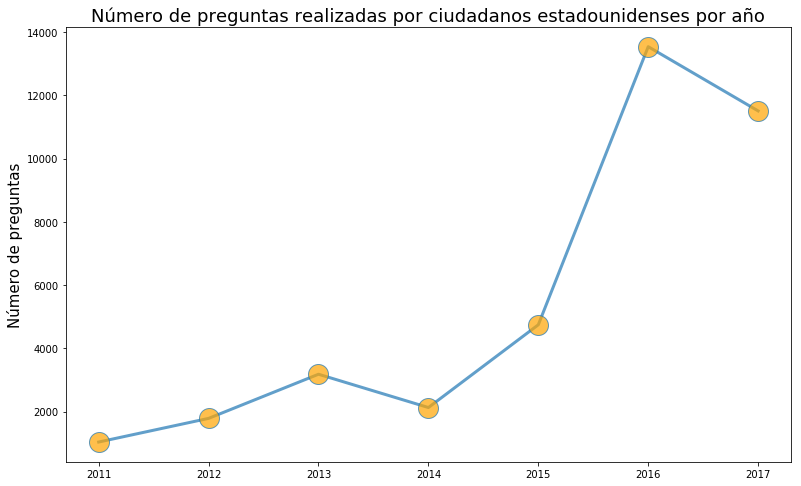

In [198]:
plt.figure(figsize=(13,8))
plt.plot(Paises2013, '-o', ms=20, lw=1, alpha=0.7, mfc='orange',linewidth=3)
plt.title("Número de preguntas realizadas por ciudadanos estadounidenses por año", fontsize=18)  # Establece el título del gráfico
plt.ylabel("Número de preguntas", fontsize=15)   # Establece el título del eje y


### 5. Cuántas personas por género presentan salarios entre 140.001-160.000,160.001-180.000 y 180.001-200.000?

In [230]:
Salario =pd.crosstab(data.Salary, data.Gender).reset_index().loc[[3,4,5]]
Salario

Gender,Salary,Female,Male,Otros
3,$140.001-$160.000,66,1761,48
4,$160.001-$180.000,28,1017,46
5,$180.001-$200.000,30,889,40


Text(0,0.5,'Países')

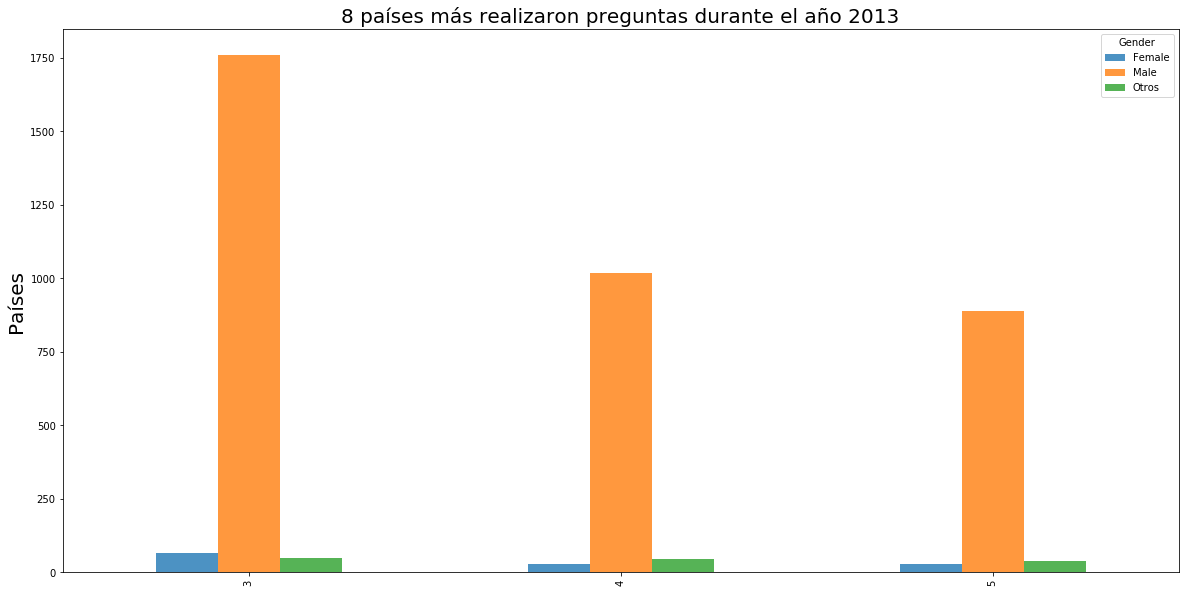

In [233]:
Salario.plot(kind='bar', alpha = 0.8,figsize=(20,10))
plt.title('8 países más realizaron preguntas durante el año 2013',fontsize=20)
plt.ylabel("Países", fontsize=20)

### 6. Cuál es el lenguaje de programación más usado por genero?


In [228]:
data2014 = dataset1[dataset1["Year"] == 2014].count().sort_values(ascending = False)
data2014

#data[data['Year']==data2014[1]]

Year          7643
JavaScript    3783
SQL           3467
Java          2479
CSharp        2378
PHP           1710
Python        1473
CPlusPlus     1418
C             1174
ObjectiveC     675
Nodejs         641
Ruby           593
Perl            91
CSS             42
jQuery          21
AngularJS       12
HTML5            8
TypeScript       4
SQL_Server       0
dtype: int64

In [219]:
pd.crosstab(data.Salary, data.SQL).reset_index()

SQL,Salary,Current Lang & Tech: SQL,SQL
0,$0-$20.000,0,10130
1,$100.001-$120.000,0,3412
2,$120.001-$140.000,0,1735
3,$140.001-$160.000,0,1280
4,$160.001-$180.000,0,492
5,$180.001-$200.000,0,439
6,$20.001-$40.000,0,7590
7,$40.001-$60.000,0,7655
8,$60.001-$80.000,0,6555
9,$80.001-$100.000,0,4454


In [210]:
data2014.pivot_table()

AttributeError: 'Series' object has no attribute 'pivot_table'

### 5. Cuál es el lenguaje de programación más usado por rango de experiencia en 2017?
#### Consulta en SQL






#### Respuesta






#### Gráfica

### 6. Cual lenguaje de programación tuvo mayor crecimiento en los ultimos 3 años?


#### Consulta en SQL






#### Respuesta






#### Gráfica

### 7. Cual lenguaje de programación tuvo mayor decrecimiento en los ultimos 3 años?
#### Consulta en SQL






#### Respuesta






#### Gráfica

### 8. Cuál es el lenguaje de programación más usado por rango de edad en 2017?
#### Consulta en SQL






#### Respuesta






#### Gráfica

### 9. En el rango de salarios más alto, cual es la proporción por género?

#### Consulta en SQL






#### Respuesta






#### Gráfica

### 10. En Colombia, cual es el lenguaje de programación más usado por año?

#### Consulta en SQL






#### Respuesta






#### Gráfica

### 11.  En Estados Unidos, cual es el lenguaje de programación más usado por año?

#### Consulta en SQL






#### Respuesta






#### Gráfica

### 12.  Qué pais tiene mayor proporción de programadores con mayor experiencia?

#### Consulta en SQL






#### Respuesta






#### Gráfica

### 13.  En los principales paises de Europa, cual es el lenguaje de programación más usado?

#### Consulta en SQL






#### Respuesta






#### Gráfica

### 14.  Cuales lenguajes de programación usados en 2017 no se usaban en 2011?

#### Consulta en SQL






#### Respuesta






#### Gráfica

### 15. Cual es el lenguaje de programación con menores salarios? 

#### Consulta en SQL






#### Respuesta






#### Gráfica